# From the MQT YAQS Documentation

Developing a simulation of a given noise model

## Constructing Circuits

Here we make an Ising circuit, used to examine compilers/transpilers.

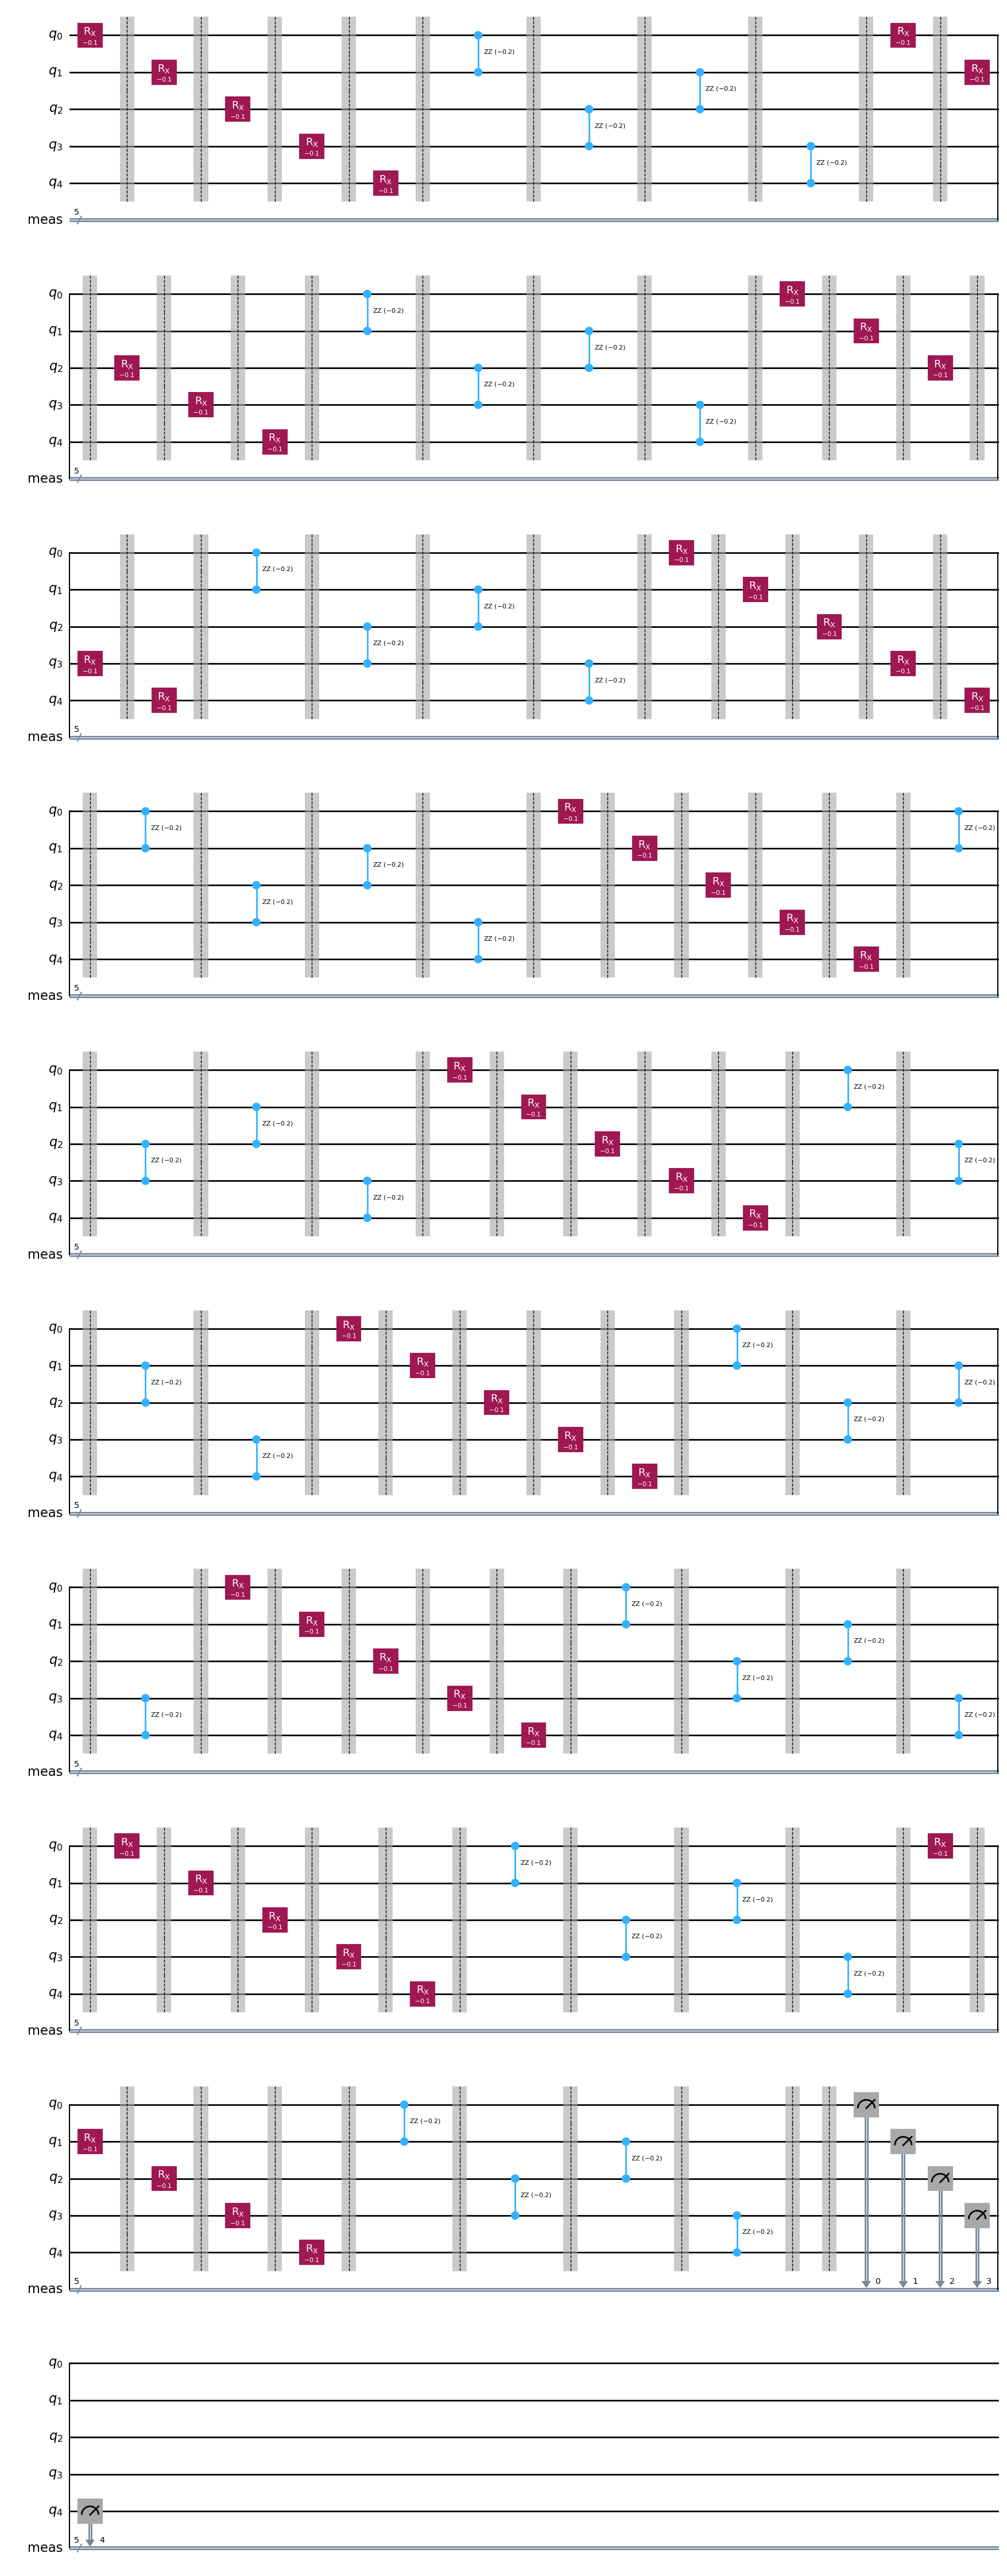

In [1]:
from mqt.yaqs.core.libraries.circuit_library import create_ising_circuit

num_qubits = 5
circuit = create_ising_circuit(L=num_qubits, J=1, g=0.5, dt=0.1, timesteps=10)
circuit.measure_all()
circuit.draw(output="mpl")

Below the `TwoLocal()` function is edited from the documentation, as `TwoLocal()` is deprecated in the current version of Qiskit.

`TwoLocal()` constructs a type of variational circuit with certain parameters, defined here

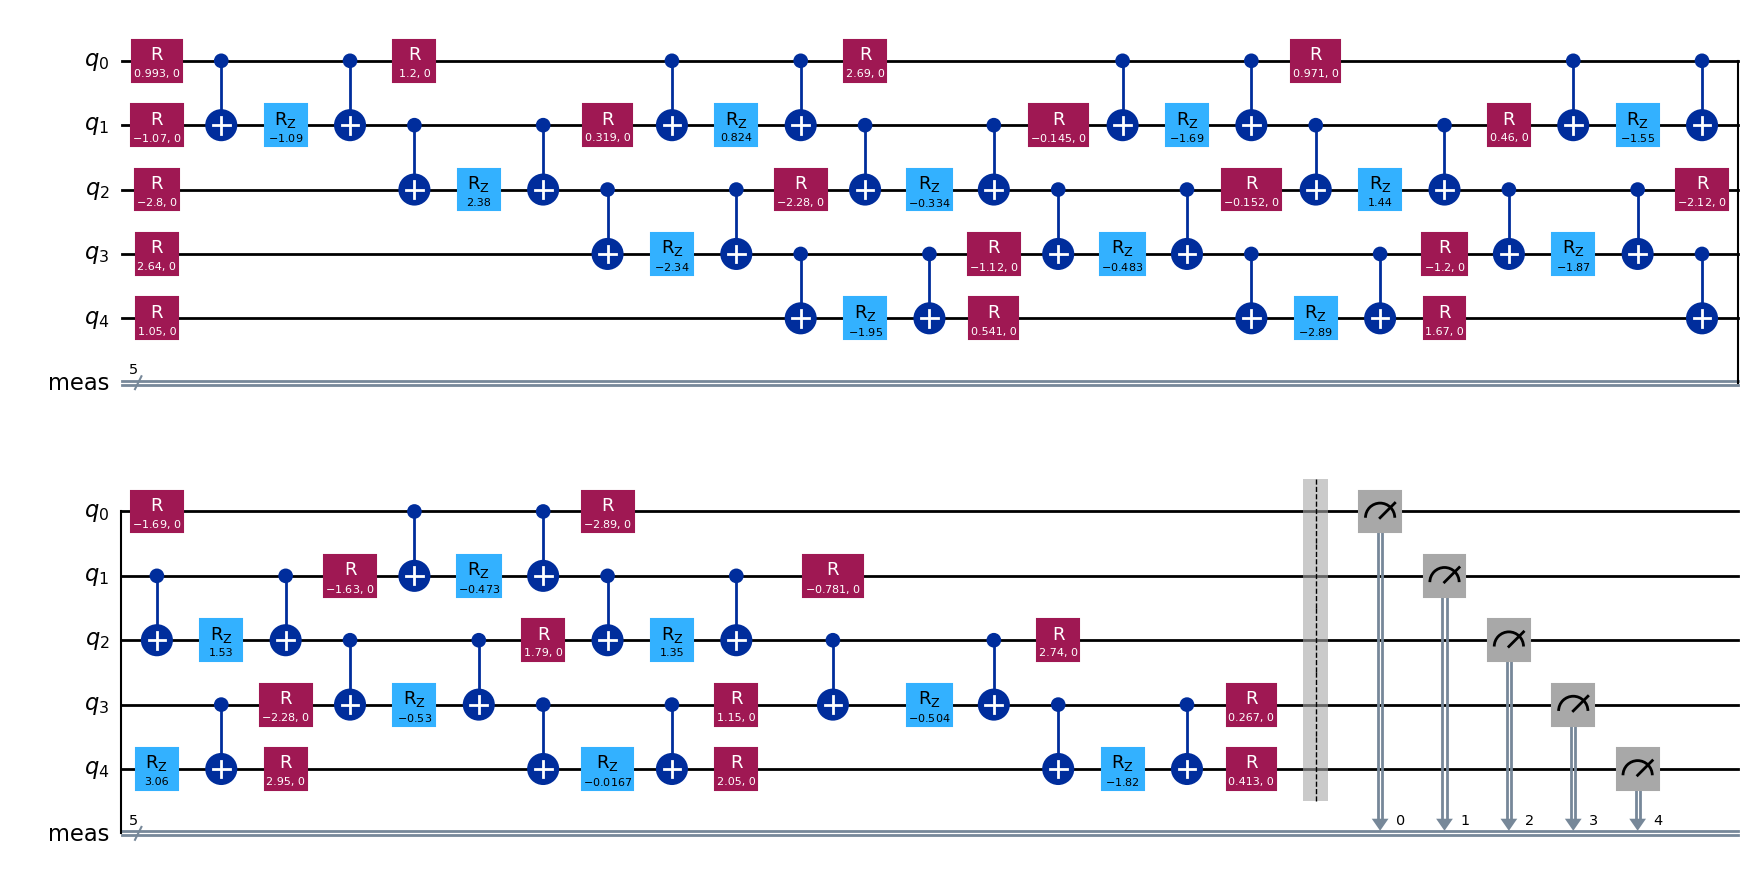

In [4]:
import qiskit.circuit.library.n_local as TwoLocal

import numpy as np

num_qubits = 5
circuit = TwoLocal(num_qubits, ["rx"], ["rzz"], entanglement="linear", reps=num_qubits).decompose()
num_pars = len(circuit.parameters)
rng = np.random.default_rng()
values = rng.uniform(-np.pi, np.pi, size=num_pars)
circuit.assign_parameters(values, inplace=True)
circuit.measure_all()
circuit.draw(output="mpl")

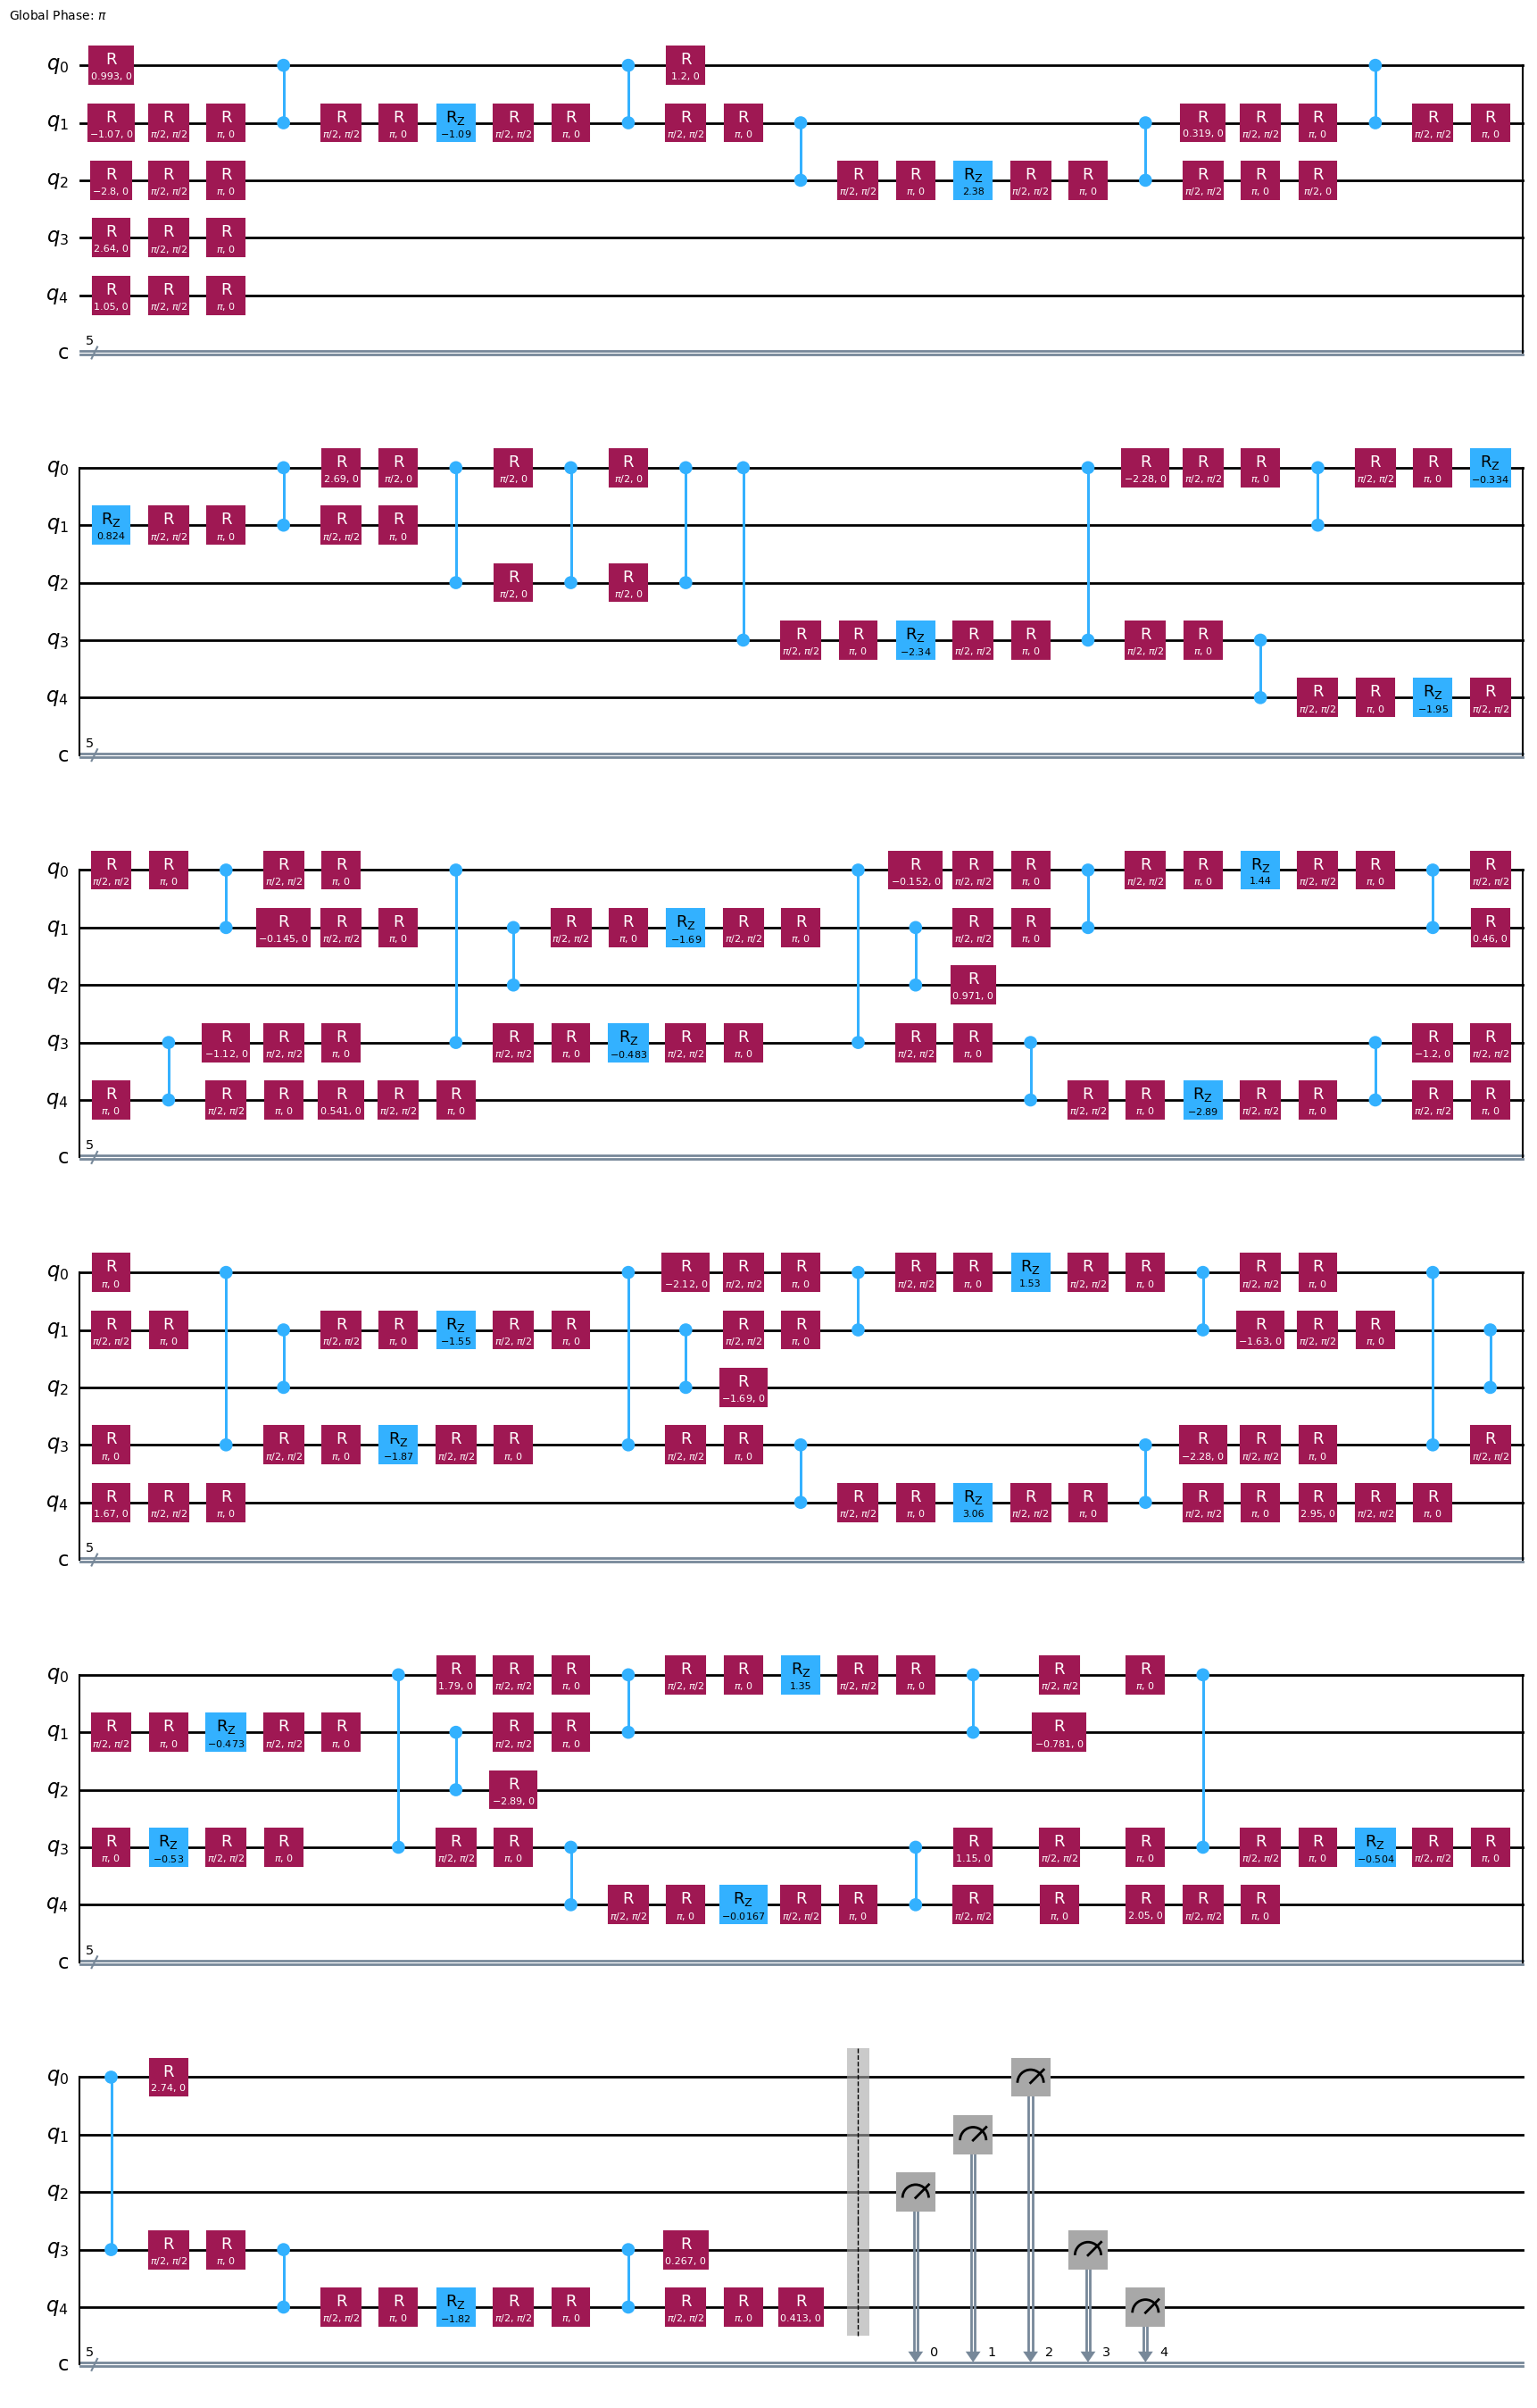

In [7]:
from mqt.qmap.plugins.qiskit.sc import compile
from mqt.qmap.sc import Method
from mqt.qmap.sc import Architecture
from qiskit import transpile

connectivity_set = {
        (0, 1),
        (0, 2),
        (0, 3),
        (1, 0),
        (1, 2),
        (2, 0),
        (2, 1),
        (3, 0),
        (3, 4),
        (4, 3)
    }

arch = Architecture(
    5, connectivity_set)

# IQM native gate set, different for different hardware
native_gates = ['r', 'rz', 'cz'] 

qc_mapped, res = compile(circuit, arch, method = Method.heuristic, post_mapping_optimizations = True)
qc_mapped = transpile(qc_mapped, basis_gates = native_gates, optimization_level = 0)
qc_mapped.draw("mpl")

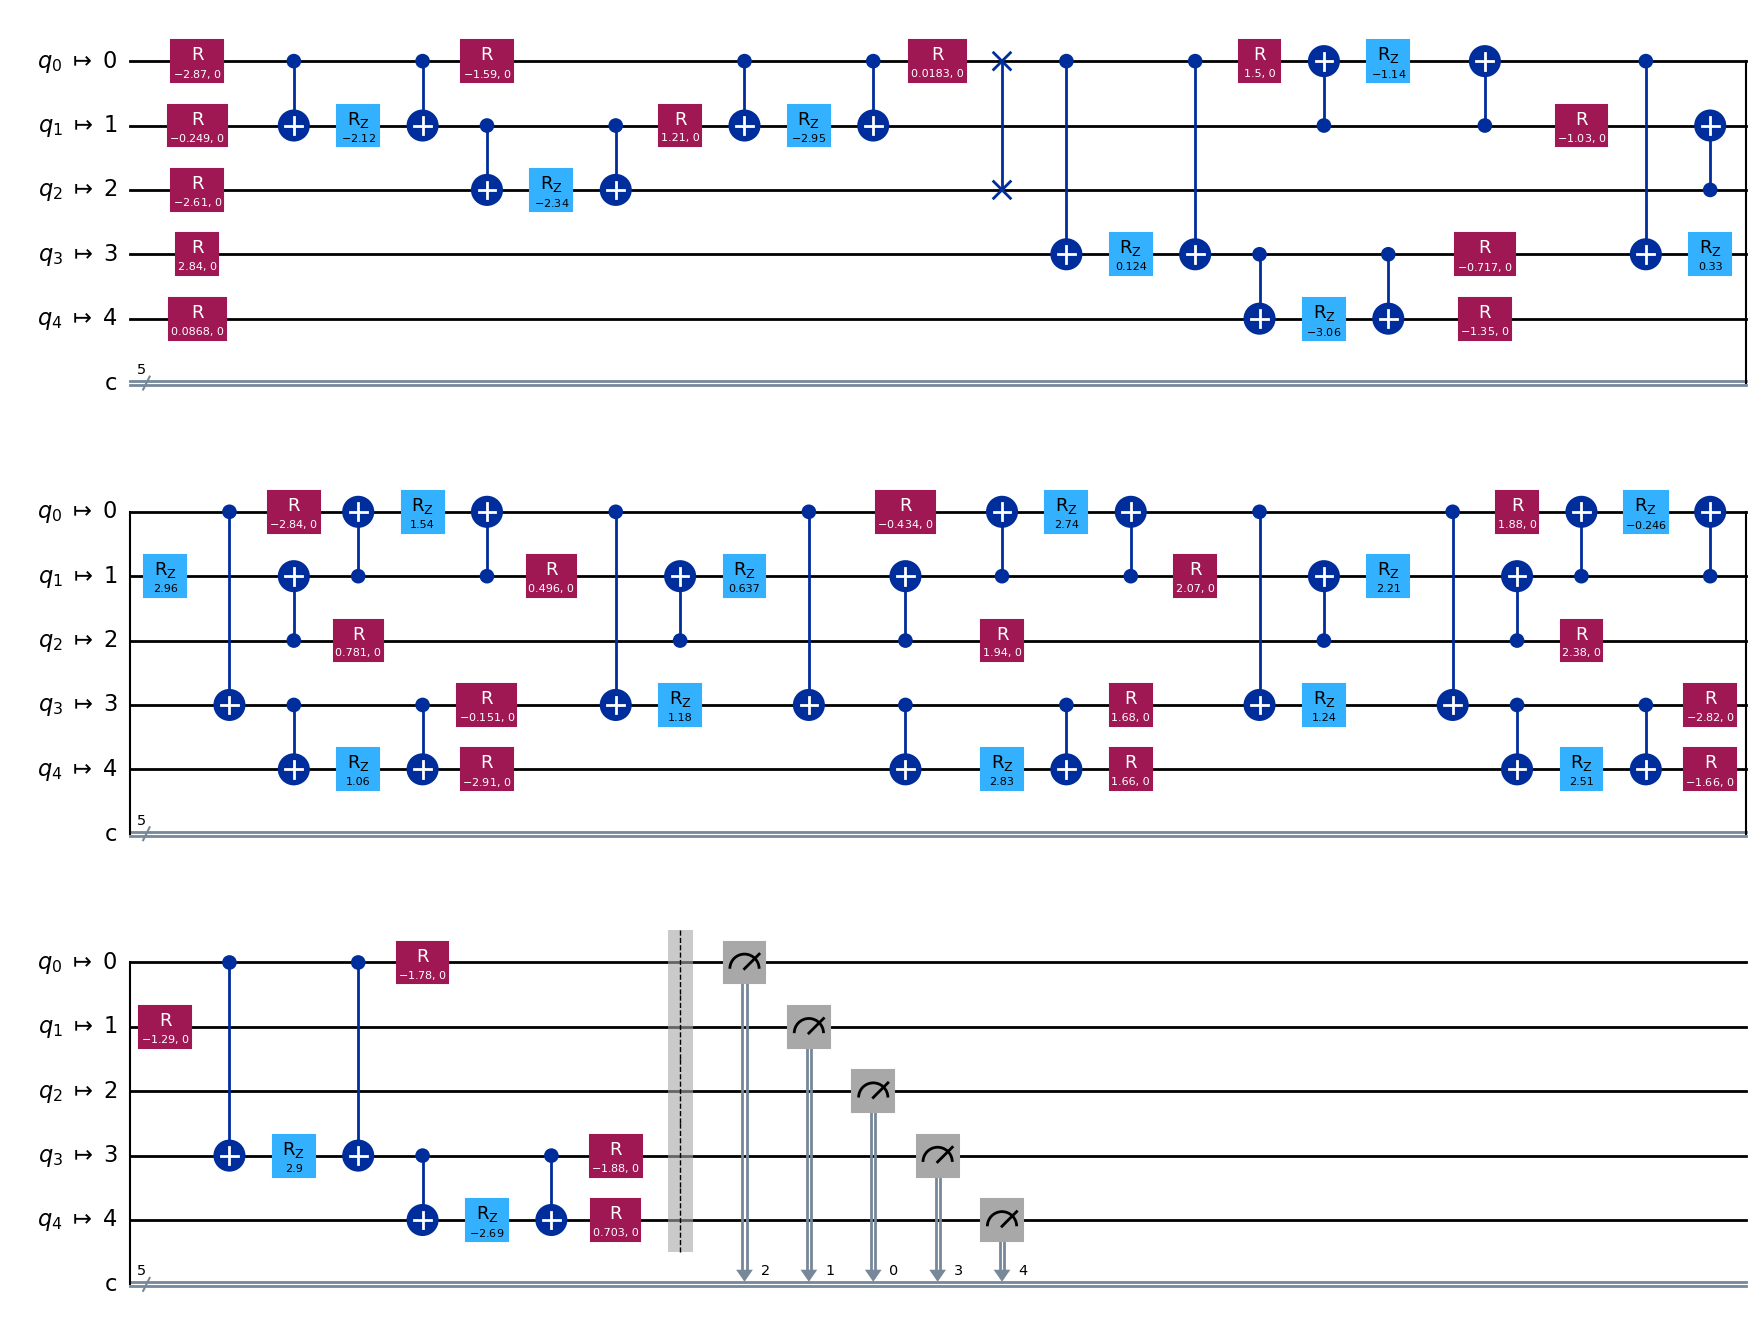

In [4]:
qc_mapped.draw("mpl")